In [1]:
import matplotlib.pyplot as plt
import numpy as np
import import_ipynb
from soil_utils import *

importing Jupyter notebook from soil_utils.ipynb


In [2]:
PSAData = {
    "CaCO3_AC_99p95db_02_01" : 0,
    "CocoaPowder_PreMix" : 0,
    "silica_325mesh_99p5tmb" : 0,
    "SoyFlour_PreMix" : 0,
    "TurkishCoffee_PreMix" : 0,
    "TurkishCoffee" : 0,
    "WholeEggPowder_PreMix" : 0
}

for x in PSAData :
    PSAData[x] = get_psd_from_file("../data/particle_size_analyses/"+x+".xls")

Text(0, 0.5, 'PDF density')

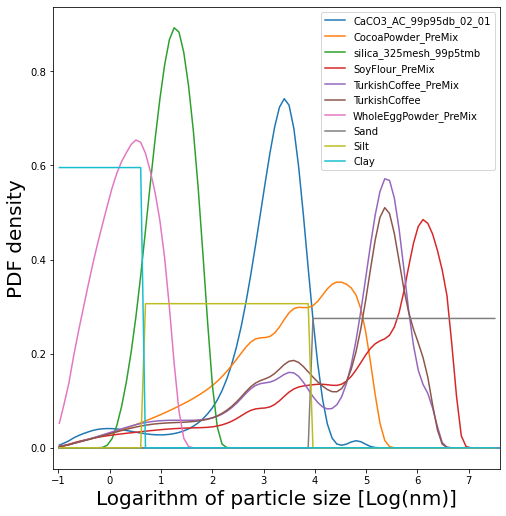

In [21]:
fig, ax = plt.subplots(1,figsize=[8,8.5])

for material in PSAData :
    tlin, tvol, _, _ = PSAData[material]
    tvol = tvol / np.sum(np.diff(np.log(np.array(tlin))) * np.array(tvol),axis=0)
    ax.plot(np.log(np.array(tlin))[:-1],np.array(tvol),label=material)
    
perfect_psds = [generate_fake_psd(torch_psd_linspace,1.0,0.0).tolist(),
                generate_fake_psd(torch_psd_linspace,0.0,1.0).tolist(),
                generate_fake_psd(torch_psd_linspace,0.0,0.0).tolist()]
perfectpsdlab = ["Sand", "Silt", "Clay"]
for i in range(len(perfect_psds)) :
    tvol = np.array(perfect_psds[i])
    tvol = tvol[:-1] / np.sum(np.diff(np.log(fake_psd_linspace)) * tvol[:-1],axis=0)
    ax.plot(np.log(fake_psd_linspace)[:-1],np.array(tvol),label=perfectpsdlab[i])
    
    
ax.legend()
plt.hlines(0,xmin=-1,xmax=np.log(2000))
plt.xlim(-1.1,np.log(2000))
plt.xlabel("Logarithm of particle size [Log(nm)]",fontsize=20)
plt.ylabel("PDF density",fontsize=20)

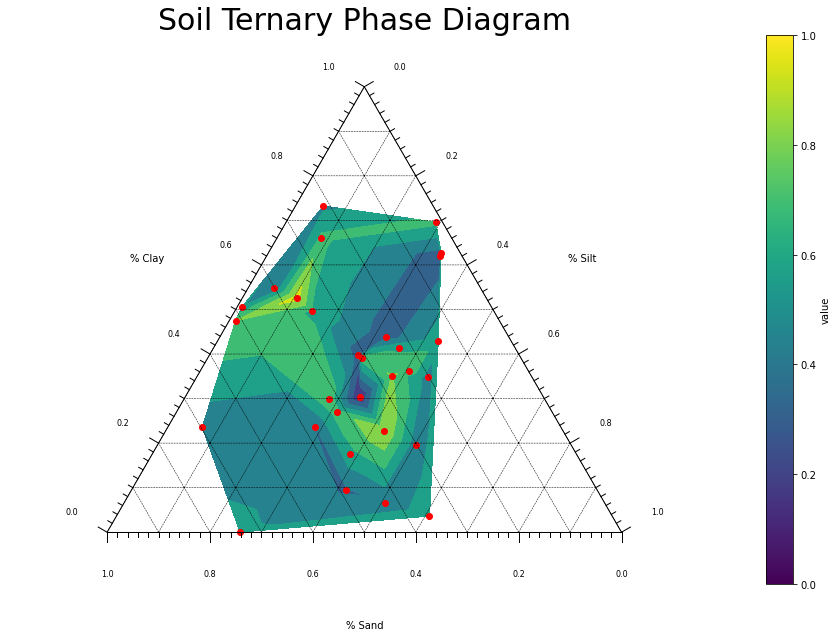

(<Figure size 1152x806.4 with 2 Axes>,
 <AxesSubplot:title={'center':'Soil Ternary Phase Diagram'}>,
 <module 'matplotlib.pyplot' from '/Users/ecoleman/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [4]:
random_parts = np.random.rand(30,3)
random_parts = np.divide(random_parts,np.reshape(np.repeat(np.sum(random_parts,axis=1),3),(30,3)))

sand_test = random_parts[:,0]
clay_test = random_parts[:,1]
val_test  = np.random.randn(30)

plot_ternary_phase_diagram(sand_test,clay_test,val_test)

## Run on perfect sand, silt, and clay PSDs 

In [5]:
ssc_alopsd = torch.tensor([generate_fake_psd(torch_psd_linspace,1.0,0.0).tolist(),generate_fake_psd(torch_psd_linspace,0.0,1.0).tolist(),generate_fake_psd(torch_psd_linspace,0.0,0.0).tolist()])

aloa = []
alol = []
for i in range(len(random_parts)) :
    part = random_parts[i]
    print(part)
    
    tSand = part[0]
    tSilt = part[1]
    
    abunds, tloss = regress_abundances_by_psd(generate_fake_psd(torch_psd_linspace,tSand,tSilt),ssc_alopsd)
    print("\t - ",abunds,", ",tloss,"\n")
    aloa += [abunds]
    alol += [tloss]
    break

[0.31335745 0.28825097 0.39839158]
	 -  [0.313357412815094, 0.28825095295906067, 0.39839157462120056] ,  -3.271411882606575e-16 



## Run on PSDs from lab measurements

In [6]:
alopsd = []
for material in PSAData :
    print(material)
    tlin, tvol, _, _ = PSAData[material]
    tvol = tvol / np.sum(np.diff((np.array(tlin))) * np.array(tvol),axis=0)
    alopsd += [tvol.tolist()]
    
alopsd = torch.tensor(alopsd)

CaCO3_AC_99p95db_02_01
CocoaPowder_PreMix
silica_325mesh_99p5tmb
SoyFlour_PreMix
TurkishCoffee_PreMix
TurkishCoffee
WholeEggPowder_PreMix


In [22]:
aloa = []
alol = []
for i in range(len(random_parts)) :
    part = random_parts[i]
    print(part)
    
    tSand = part[0]
    tSilt = part[1]
    
    abunds, tloss = regress_abundances_by_psd(generate_fake_psd(torch_psd_linspace[:-1],tSand,tSilt),alopsd)
    
    abunds = np.array(abunds)
    abunds = ((abunds > 0.01).astype("float32") * abunds)
    abunds = (abunds/np.sum(abunds)).tolist()
    
    print("\t - ",abunds,", ",tloss,"\n")
    aloa += [abunds]
    alol += [tloss]

[0.31335745 0.28825097 0.39839158]
	 -  [0.40278177587047864, -0.0, -0.0, 0.0, -0.0, -0.0, 0.5972182241295214] ,  -0.2186827484752607 

[0.14110249 0.42869806 0.43019945]
	 -  [0.4650414935735875, -0.0, -0.0, -0.0, -0.0, -0.0, 0.5349585064264125] ,  -0.25246931873301065 

[0.35301294 0.15101729 0.49596977]
	 -  [0.27097318014928723, -0.0, -0.0, -0.0, -0.0, -0.0, 0.7290268198507128] ,  -0.34433480830397506 

[0.48418982 0.00958327 0.50622691]
	 -  [0.14109695440269904, -0.0, -0.0, -0.0, -0.0, -0.0, 0.858903045597301] ,  -0.36270332358016205 

[0.30226418 0.50258523 0.19515059]
	 -  [0.6644021290913216, -0.0, -0.0, -0.0, 0.0, -0.0, 0.3355978709086785] ,  -0.049264379621001296 

[0.22626368 0.36036783 0.41336848]
	 -  [0.43833539179815667, -0.0, -0.0, 0.0, -0.0, 0.0, 0.5616646082018433] ,  -0.2341555735397478 

[0.03723334 0.33559365 0.62717301]
	 -  [0.349588862909352, -0.0, -0.0, -0.0, -0.0, -0.0, 0.650411137090648] ,  -0.5458394229902199 

[0.25445274 0.08611814 0.65942913]
	 -  [0.196

KeyboardInterrupt: 